442 10
(442,)


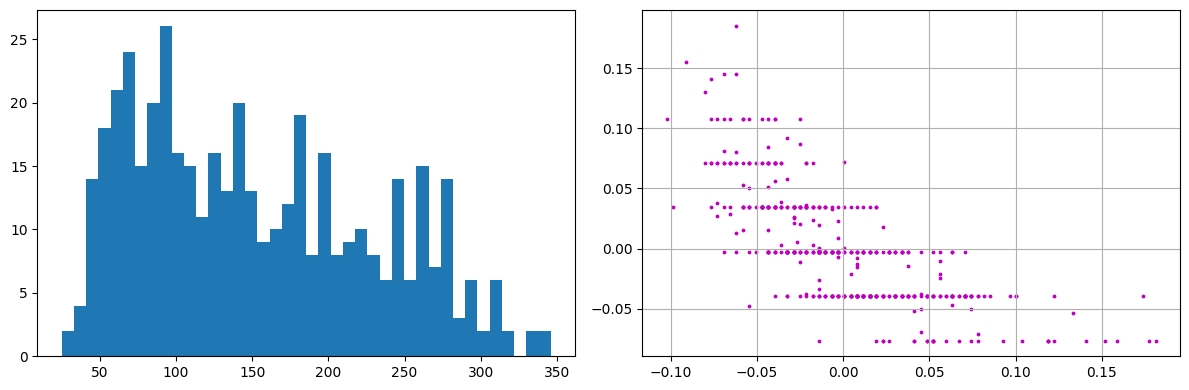

In [59]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
# Load data, inspect and do exploratory plots
#
diabetes = datasets.load_diabetes()
X = diabetes.data
t = diabetes.target
# Inspect sizes
#
NumData, NumFeatures = X.shape
print(NumData, NumFeatures) # 442 X 10
print(t.shape) # 442
# Plot and save
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(t, bins=40)
ax[1].scatter(X[:,6], X[:,7], c='m', s=3)
ax[1].grid(True)
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

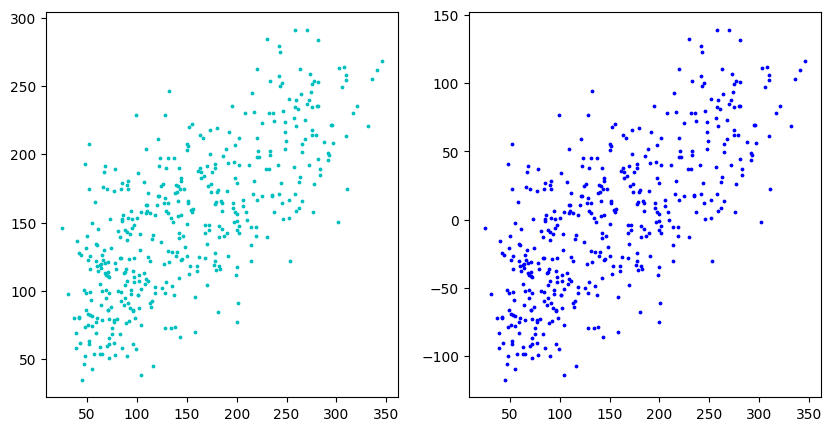

In [60]:
# Linear regression using sklearn
#
lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)
# Pseudo-incerse solution to linear regression
#
w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='c', s=3)
ax[1].scatter(t, th2, c='b', s=3)

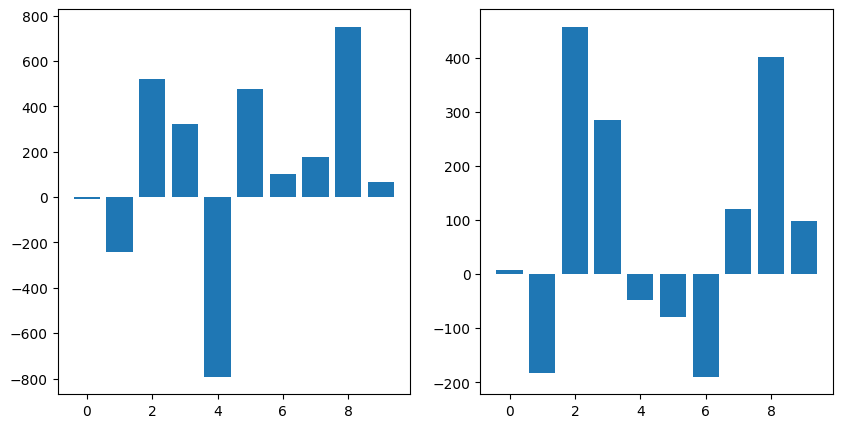

In [61]:
gamma = 0.2
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(w)), wR)
plt.savefig("LeastSquaresAndRegularizedWeights.jpg")

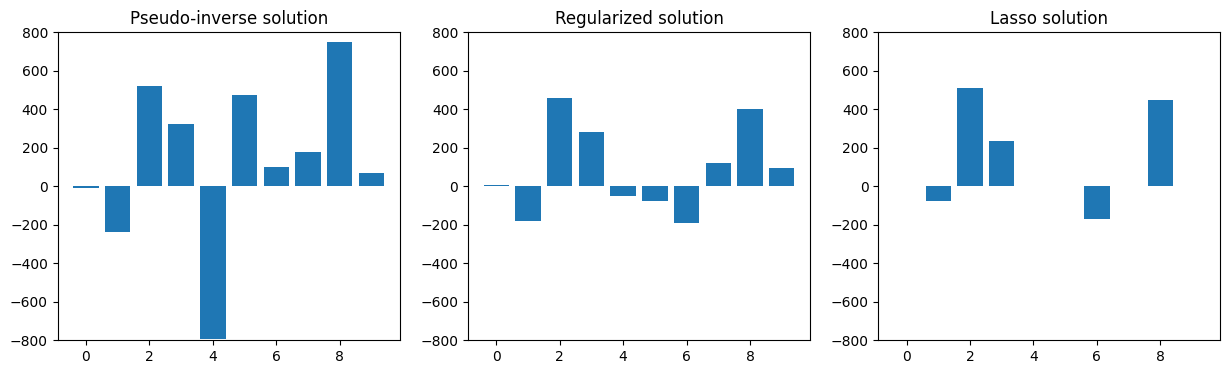

In [62]:
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(X, t)
th_lasso = ll.predict(X)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(w)), wR)
ax[2].bar(np.arange(len(ll.coef_)), ll.coef_)
ax[0].set_ylim(-800,800)
ax[1].set_ylim(-800,800)
ax[2].set_ylim(-800,800)
ax[0].set_title('Pseudo-inverse solution')
ax[1].set_title('Regularized solution')
ax[2].set_title('Lasso solution')
#
#...
#
plt.savefig("solutions.png")

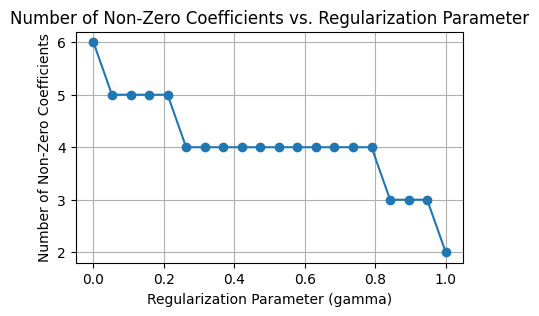

In [68]:
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are your data

# Define a range of regularization parameters (gamma)
gammas = np.linspace(0.001, 1, 20)

# Initialize an empty list to store the number of non-zero coefficients for each gamma
non_zero_coeffs = []

# Fit Lasso models for each gamma and track the number of non-zero coefficients
for gamma in gammas:
    # Instantiate Lasso model
    lasso_model = Lasso(alpha=gamma)

    # Fit the model
    lasso_model.fit(X, y)

    # Count the number of non-zero coefficients
    num_non_zero = np.sum(lasso_model.coef_ != 0)

    # Append to the list
    non_zero_coeffs.append(num_non_zero)

# Plot the number of non-zero coefficients as a function of gamma
plt.figure(figsize=(5, 3))
plt.plot(gammas, non_zero_coeffs, marker='o', linestyle='-')
plt.xlabel('Regularization Parameter (gamma)')
plt.ylabel('Number of Non-Zero Coefficients')
plt.title('Number of Non-Zero Coefficients vs. Regularization Parameter')
plt.grid(True)
plt.show()


In [63]:
from sklearn.linear_model import lasso_path
from sklearn import datasets
# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1 -1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.
N = 100
y = np.empty(0)
X = np.empty([0,6])
for i in range(N):
  Z1= np.random.randn()
  Z2= np.random.randn()
  y = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn())
  Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.randn(6)/5
  X = np.vstack ((X, Xarr.tolist()))

Text(0, 0.5, 'Regression Coefficients')

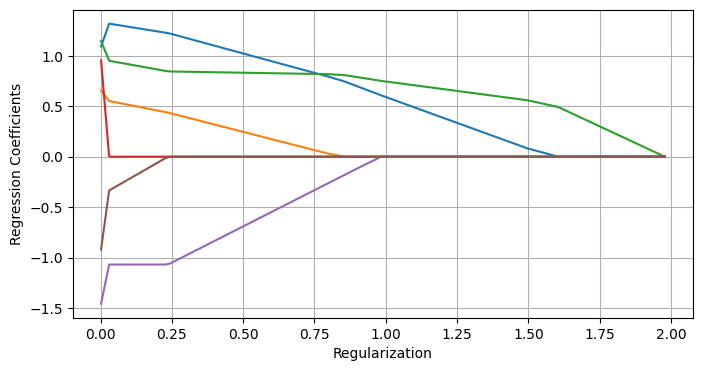

In [64]:
# Compute regressions with Lasso and return paths
#
alphas_lasso, coefs_lasso, _ = lasso_path(X, y)
# Plot each coefficient
#
fig, ax = plt.subplots(figsize = (8,4))
# plt.gca().invert_xaxis()
for i in range(6):
  ax.plot(alphas_lasso, coefs_lasso[i,:])
ax.grid(True)
ax.set_xlabel("Regularization")
ax.set_ylabel("Regression Coefficients")

(932, 2255)
(932,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.850e+02, tolerance: 2.759e-01
  model = cd_fast.enet_coordinate_descent(


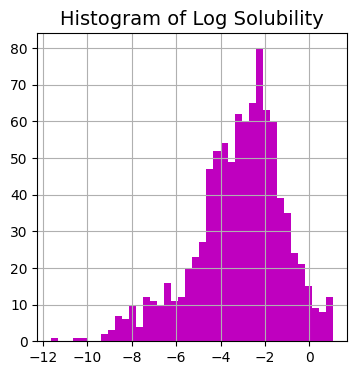

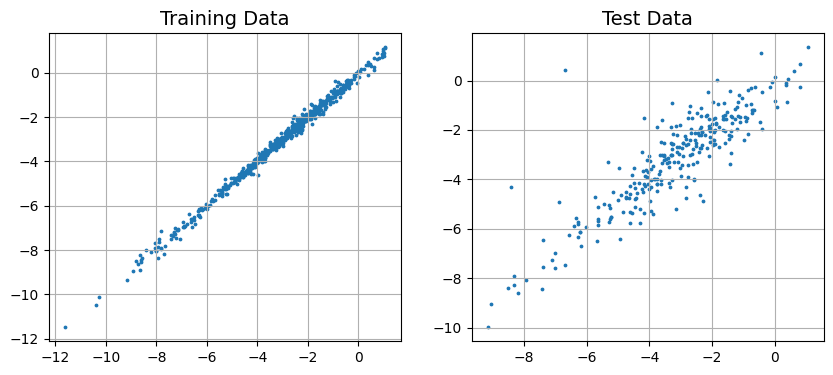

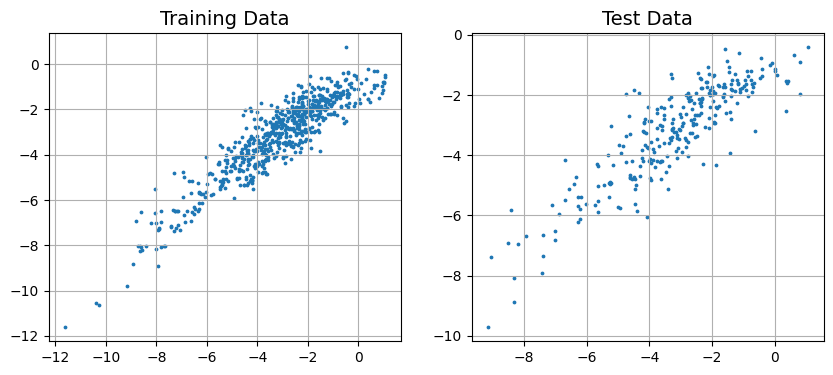

<Figure size 640x480 with 0 Axes>

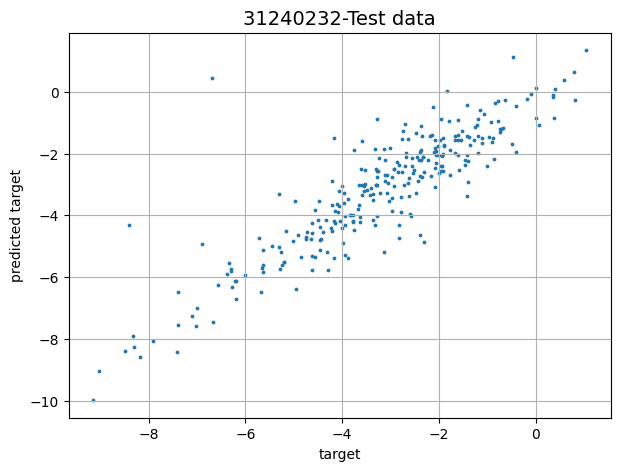

<Figure size 640x480 with 0 Axes>

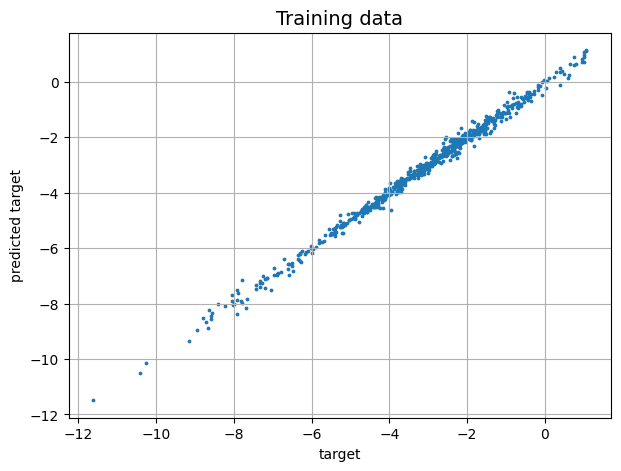

<Figure size 640x480 with 0 Axes>

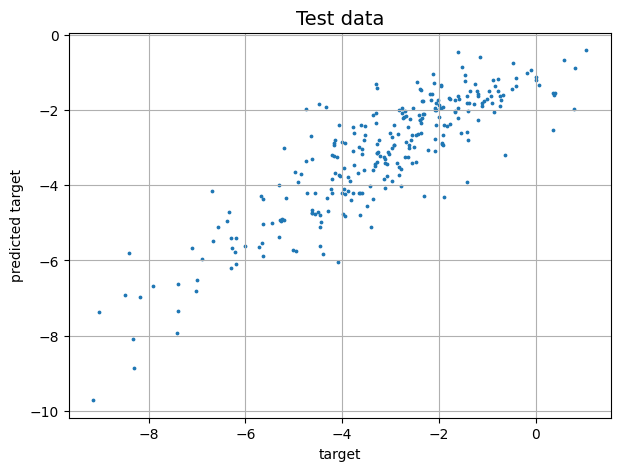

<Figure size 640x480 with 0 Axes>

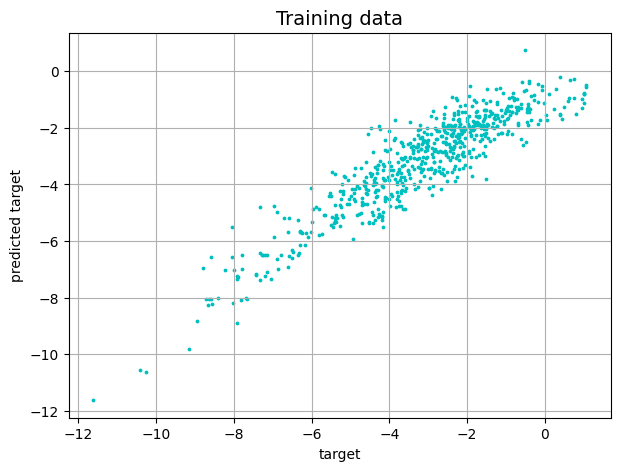

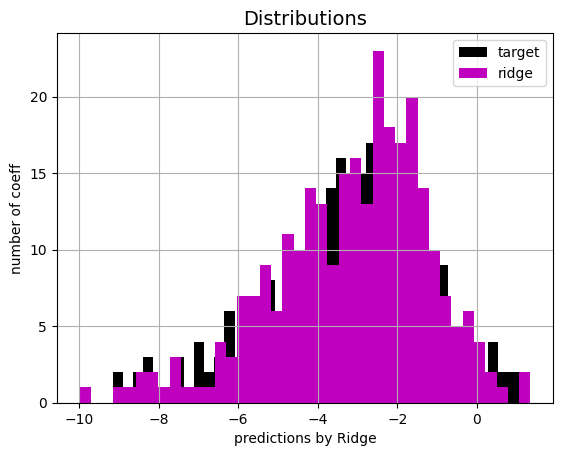

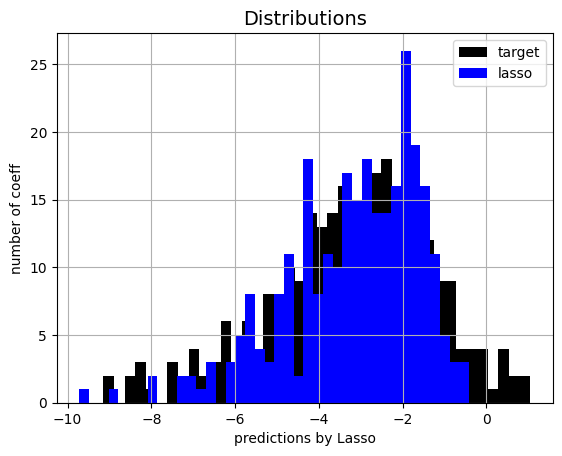

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
sol = pd.read_excel("Husskonen_Solubility_Features.xlsx")

sol = sol.iloc[:,:-1]

colnames = sol.columns
#print(colnames)

f = sol["LogS.M."].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(f, bins=40, facecolor='m')
ax.set_title("Histogram of Log Solubility", fontsize=14)
ax.grid(True)

Y = sol[colnames[5:len(colnames)]]
N, p = Y.shape

print(Y.shape)
print(f.shape)

# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
Y_train, Y_test, f_train, f_test = train_test_split(Y, f, test_size=0.3)

# Regularized regression
#
gamma = 2.3
sa = np.linalg.inv(Y_train.T @ Y_train + gamma*np.identity(p)) @ Y_train.T @ f_train
a = sa.to_numpy()
fh_train = Y_train @ a
fh_test = Y_test @ a

# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(f_train, fh_train, s=3)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=14)

ax[1].scatter(f_test, fh_test,  s=3)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)

# Over to you for implementing Lasso
#
from sklearn.linear_model import Lasso
ll = Lasso(alpha=2.3)
ll.fit(Y_train, f_train)
fl_train = ll.predict(Y_train)
fl_test = ll.predict(Y_test)

# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(f_train, fl_train, s=3)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=14)

ax[1].scatter(f_test, fl_test, s=3)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)

fig = plt.figure()
plt.subplots(figsize=(7,5))
plt.scatter(f_test, fh_test, s=3)
plt.title('31240232-Test data', fontsize=14)
plt.ylabel('predicted target')
plt.xlabel('target')
plt.grid(True)
plt.savefig('6-L2-test.png')

fig = plt.figure()
plt.subplots(figsize=(7,5))
plt.scatter(f_train, fh_train,  s=3)
plt.title('Training data', fontsize=14)
plt.ylabel('predicted target')
plt.xlabel('target')
plt.grid(True)
plt.savefig('6-L2-training.png')

fig = plt.figure()
plt.subplots(figsize=(7,5))
plt.scatter(f_test, fl_test, s=3)
plt.title('Test data', fontsize=14)
plt.ylabel('predicted target')
plt.xlabel('target')
plt.grid(True)
plt.savefig('7-L1-test.png')

fig = plt.figure()
plt.subplots(figsize=(7,5))
plt.scatter(f_train, fl_train, c='c', s=3)
plt.title('Training data', fontsize=14)
plt.ylabel('predicted target')
plt.xlabel('target')
plt.grid(True)
plt.savefig('7-L1-training.png')


###############
fig = plt.figure()
plt.title('Distributions', fontsize=14)
plt.hist(f_test, bins=40, facecolor='k')
plt.hist(fh_test, bins=40, facecolor='m')
plt.grid(True)
plt.ylabel('number of coeff')
plt.xlabel('predictions by Ridge')
plt.gca().legend(('target','ridge'))
plt.savefig('6-predictions.png')

fig = plt.figure()
plt.title('Distributions', fontsize=14)
plt.hist(f_test, bins=40, facecolor='k')
plt.hist(fl_test, bins=40, facecolor='b')
plt.grid(True)
plt.ylabel('number of coeff')
plt.xlabel('predictions by Lasso')
plt.gca().legend(('target','lasso'))
plt.savefig('7-predictions.png')

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the data
sol = pd.read_excel("Husskonen_Solubility_Features.xlsx")

# Assuming the target variable is LogS.M., and the features are all columns except the last one
X = sol.iloc[:, :-1]
y = sol["LogS.M."]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Get indices of top 10 features
top_10_indices = np.argsort(feature_importances)[-10:]

# Get names of top 10 features
top_10_features = X_train.columns[top_10_indices]
print("Top 10 features:", top_10_features)


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.